Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 2**: Consider a Fourier series approximation of a function with the Fourier series given as $$S(x,n) = \frac{4}{\pi} \sum_{i=1}^{n}\,\frac{1}{2\,i-1}\,\sin\left(\frac{(2\,i-1)\,2\,\pi\,x}{T}\right)$$ for a fixed range of values $x/T$, i.e. values in the interval `]0,1[`, with $T$ the function period and $n$ the order of approximation, i.e. how many terms in the Fourier series should be used.

**Task**: Use `np.linspace(from, to, steps)` in order to create the $x/T$ values and plot all Fourier Series curves for the order parameters $n=(3, 10, 30)$ with appropriate axis labels and a title on a single figure. Also include a figure legend, describing your three curves. Observe how the Fourier series approximates the original step function better and better.

Therefore, **(a)** write a function `fourier(values, order)` which takes the x values from above as first input and the order parameter as a second input. It should calculate the corresponding Fourier sum and return the array of Fourier values.

Then **(b)** write a main program which creates the x values as described above and loops through the order parameters from above in order to plot the requested curves.

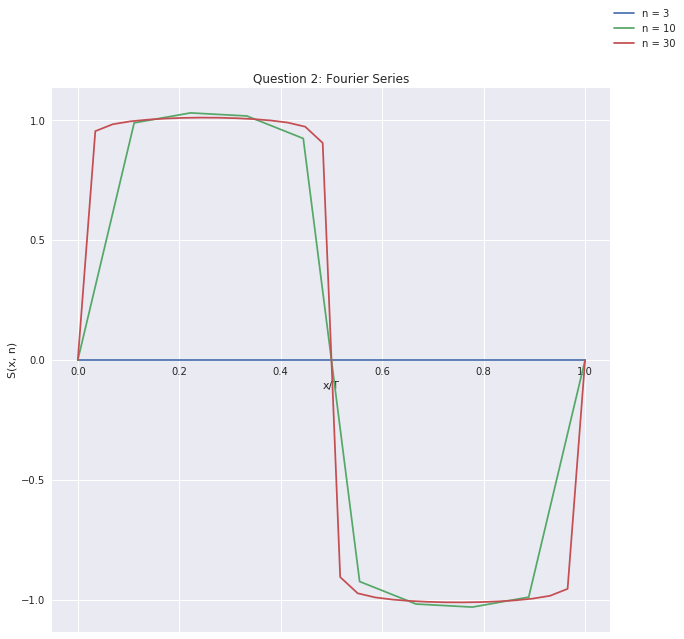

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def fourier(values, order):
    """Calculate the Fourier series for a provided set of x/T values and order.

    The Fourier sum is given by
    𝑆(𝑥/𝑇,𝑛)=4/𝜋 ∑(_𝑖=1)(^𝑛)1/(2𝑖−1) sin((2𝑖−1)2𝜋 𝑥/𝑇)
    Parameters:
    -----------
    values: np.ndarray the x/T values to use in the sum above.

    order: int value of n to use in the sum above.
    Returns:
    --------
    np.ndarray of the Fourier sum applied to each of the values, same
    size as size of values.
    """
    return (
      4
      / np.pi
      * sum(
        [
          1 / (2 * i - 1) * np.sin(((2 * i - 1) * 2 * np.pi * values))
          for i in range(1, order + 1)
        ]
      )
    )


n_values = (3, 10, 30)
fourier_graphs = {i: fourier(np.linspace(0, 1, i), i) for i in n_values}

# since there is no style guide here I'm using seaborn
plt.style.use("seaborn")
# create the subplot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# plot each of the graphs in a list comprehension
# because I'm just that cool
[
  ax.plot(np.linspace(0, 1, order), graph, label=f"n = {order}")
  for order, graph in fourier_graphs.items()
]
# add a legend, title and axis labels, as well as background colour
fig.legend()
ax.set_xlabel("x/T")
ax.set_ylabel("S(x, n)")
ax.set_title("Question 2: Fourier Series")
# hide the top and right spines and move the bottom one
# to the centre to make the graph pretty
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_position("center")
# show the result
fig.show()
fig.savefig("Q2out.png", dpi=fig.dpi)

In [2]:
# Test cell
xt = np.array([0.01, 0.25, 0.6])
# order test
assert fourier(xt, 3)[0] < fourier(xt, 10)[0]
assert fourier(xt, 3)[1] > fourier(xt, 10)[1]

In [3]:
# Test cell
assert fourier(xt, 3)[0] > 0.22 and fourier(xt, 3)[0] < 0.25

### Tests - 3 marks; Style - 1 mark; Plot - 3 marks